In [1]:
import numpy as np
import pandas as pd
import scipy 
import mne
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import scipy.stats as stats

NDR = pd.read_excel('Raw_NDR.xlsx', 'Sheet2')
# print(NDR)

G1_Bsl = np.empty([15,5,6,2])
G1_P10 = np.empty([15,5,6,2])
G1_P30 = np.empty([15,5,6,2])
G2_Bsl = np.empty([15,5,6,2])
G2_P10 = np.empty([15,5,6,2])
G2_P30 = np.empty([15,5,6,2])
G5_Bsl = np.empty([15,5,6,2])
G5_P10 = np.empty([15,5,6,2])
G5_P30 = np.empty([15,5,6,2])

for a in range(15):
    ##P10 or P30
    G1_Bsl[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G1_Bsl', a+1))
    G1_P10[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G1_P10', a+1))
    G1_P30[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G1_P30', a+1))
    G2_Bsl[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G2_Bsl', a+1))
    G2_P10[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G2_P10', a+1))
    G2_P30[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G2_P30', a+1))
    G5_Bsl[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/Bsl/zPAC_V1V5_%s_%s.npy' %('G5_Bsl', a+1))
    G5_P10[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P10/zPAC_V1V5_%s_%s.npy' %('G5_P10', a+1))
    G5_P30[a,:,:,:] = np.load('../../../Documents/10.19/CrossFr_Sources/Data/zPAC/P30/zPAC_V1V5_%s_%s.npy' %('G5_P30', a+1))
    
print(G1_Bsl.shape) # Subjects x HiFr x LoFr x 2 Direction of Interaction


(15, 5, 6, 2)


In [2]:
# Lo Frequency Parameters
min_lo = 3
max_lo = 15
num_lo = 6
frex_lo = np.linspace(min_lo, max_lo, num_lo)
print(frex_lo)
# Hi Frequency Parameters
min_hi = 22
max_hi = 42
num_hi = 5
frex_hi = np.linspace(min_hi, max_hi, num_hi)
print(frex_hi)

[ 3.   5.4  7.8 10.2 12.6 15. ]
[22. 27. 32. 37. 42.]


NO DIFFERENCE
V1pV5a Pearson r: 0.23938943189572395 and p-value: 0.12678607084391727
V1aV5p Pearson r: -0.048961309152029536 and p-value: 0.758147444822972


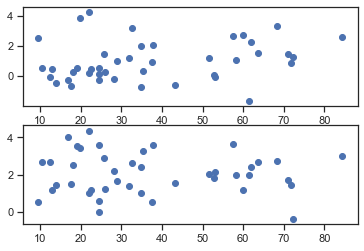

In [3]:
### GLOBAL CORRELATION BASELINE

# B=0 V1pV5a
G1_Bsl_avg_0 = np.mean(G1_Bsl[:,2:3,1:3,0], axis=(1,2))
G1_Bsl_avg_0 = np.delete(G1_Bsl_avg_0, 1)
G2_Bsl_avg_0 = np.mean(G2_Bsl[:,2:3,1:3,0], axis=(1,2))
G2_Bsl_avg_0 = np.delete(G2_Bsl_avg_0, [0,9])
G5_Bsl_avg_0 = np.mean(G5_Bsl[:,2:3,1:3,0], axis=(1,2))
# B=1 V1aV5p
G1_Bsl_avg_1 = np.mean(G1_Bsl[:,4:5,:,1], axis=(1,2))
G1_Bsl_avg_1 = np.delete(G1_Bsl_avg_1, 1)
G2_Bsl_avg_1 = np.mean(G2_Bsl[:,4:5,:,1], axis=(1,2))
G2_Bsl_avg_1 = np.delete(G2_Bsl_avg_1, [0,9])
G5_Bsl_avg_1 = np.mean(G5_Bsl[:,4:5,:,1], axis=(1,2))

NDR_G1_Bsl = NDR['A_Bsl']
NDR_G1_Bsl = NDR_G1_Bsl.drop(index=1, inplace=False)
NDR_G2_Bsl = NDR['B_Bsl']
NDR_G2_Bsl = NDR_G2_Bsl.drop(index=[0,9], inplace=False)
NDR_G5_Bsl = NDR['E_Bsl']

x0 = pd.concat([NDR_G1_Bsl, NDR_G2_Bsl, NDR_G5_Bsl])
y0 = np.concatenate((G1_Bsl_avg_0, G2_Bsl_avg_0, G5_Bsl_avg_0), axis=0)

x1 = pd.concat([NDR_G1_Bsl, NDR_G2_Bsl, NDR_G5_Bsl])
y1 = np.concatenate((G1_Bsl_avg_1, G2_Bsl_avg_1, G5_Bsl_avg_1), axis=0)

r0,p0 = scipy.stats.pearsonr(x0, y0)
r1,p1 = scipy.stats.pearsonr(x1, y1)

print("NO DIFFERENCE")
print(f"V1pV5a Pearson r: {r0} and p-value: {p0}")
print(f"V1aV5p Pearson r: {r1} and p-value: {p1}")

plt.subplot(2,1,1)
plt.scatter(x0, y0)
plt.subplot(2,1,2)
plt.scatter(x1, y1)
plt.show()

In-Phase P30 - Baseline : V1pV5a


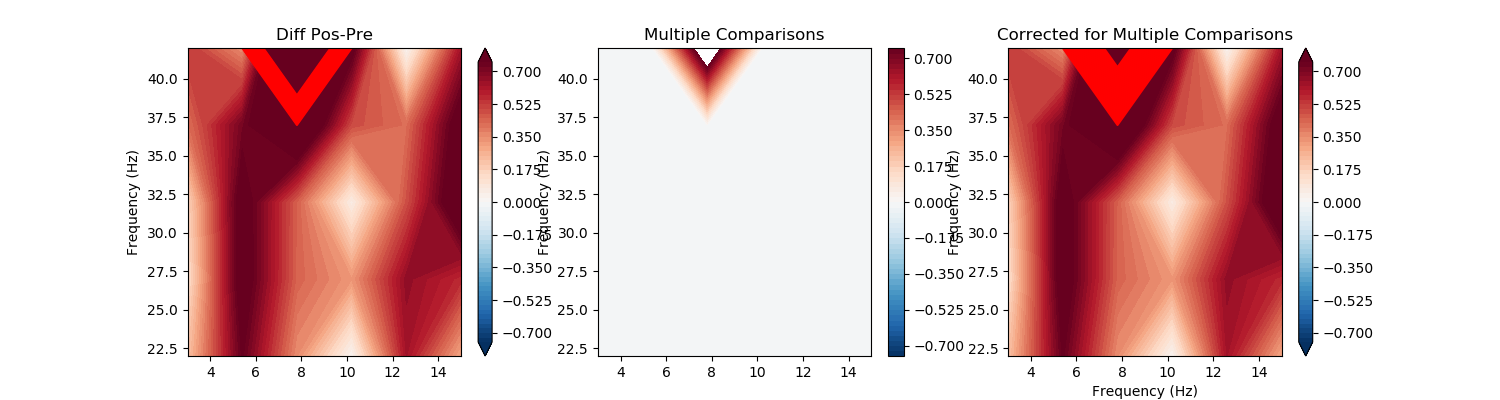

In [66]:
from PIL import Image

img1 = Image.open('../../../Documents/10.19/CrossFr_Sources/Media/Stats_TF_0_CF_G1_P3-Bsl.png')
print('In-Phase - Baseline : V1pV5a')
display(img1)

NO DIFFERENCE
V1pV5a Pearson r: 0.15935665817386474 and p-value: 0.3134340572658844
V1aV5p Pearson r: 0.2985622100489249 and p-value: 0.05478585001340728


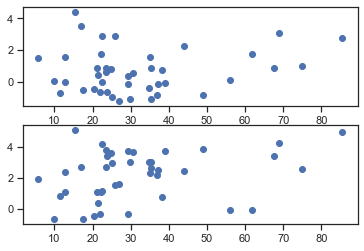

WITH DIFFERENCE
V1pV5a Pearson r: 0.16868971130256102 and p-value: 0.2855573899623545
V1aV5p Pearson r: -0.16689525931382881 and p-value: 0.29078781301653456


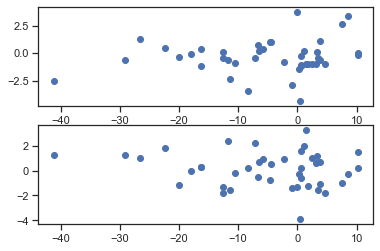

In [4]:
### GLOBAL CORRELATION P10

# B=0 V1pV5a
G1_P10_avg_0 = np.mean(G1_P10[:,2:4,3:5,0], axis=(1,2))
G1_P10_avg_0 = np.delete(G1_P10_avg_0, 1)
G2_P10_avg_0 = np.mean(G2_P10[:,2:4,3:5,0], axis=(1,2))
G2_P10_avg_0 = np.delete(G2_P10_avg_0, [0,9])
G5_P10_avg_0 = np.mean(G5_P10[:,2:4,3:5,0], axis=(1,2))
# B=1 V1aV5p
G1_P10_avg_1 = np.mean(G1_P10[:,2:3,4:5,1], axis=(1,2))
G1_P10_avg_1 = np.delete(G1_P10_avg_1, 1)
G2_P10_avg_1 = np.mean(G2_P10[:,2:3,4:5,1], axis=(1,2))
G2_P10_avg_1 = np.delete(G2_P10_avg_1, [0,9])
G5_P10_avg_1 = np.mean(G5_P10[:,2:3,4:5,1], axis=(1,2))

NDR_G1_P10 = NDR['A_P10']
NDR_G1_P10 = NDR_G1_P10.drop(index=1, inplace=False)
NDR_G2_P10 = NDR['B_P10']
NDR_G2_P10 = NDR_G2_P10.drop(index=[0,9], inplace=False)
NDR_G5_P10 = NDR['E_P10']

x0 = pd.concat([NDR_G1_P10, NDR_G2_P10, NDR_G5_P10])
y0 = np.concatenate((G1_P10_avg_0, G2_P10_avg_0, G5_P10_avg_0), axis=0)

x1 = pd.concat([NDR_G1_P10, NDR_G2_P10, NDR_G5_P10])
y1 = np.concatenate((G1_P10_avg_1, G2_P10_avg_1, G5_P10_avg_1), axis=0)

r0,p0 = scipy.stats.pearsonr(x0, y0)
r1,p1 = scipy.stats.pearsonr(x1, y1)

print('NO DIFFERENCE')
print(f"V1pV5a Pearson r: {r0} and p-value: {p0}")
print(f"V1aV5p Pearson r: {r1} and p-value: {p1}")

plt.subplot(2,1,1)
plt.scatter(x0, y0)
plt.subplot(2,1,2)
plt.scatter(x1, y1)
plt.show()

x2 = pd.concat([NDR_G1_P10-NDR_G1_Bsl, NDR_G2_P10-NDR_G2_Bsl, NDR_G5_P10-NDR_G5_Bsl])
y2 = np.concatenate((G1_P10_avg_0-G1_Bsl_avg_0, G2_P10_avg_0-G2_Bsl_avg_0, G5_P10_avg_0-G5_Bsl_avg_0), axis=0)

x3 = pd.concat([NDR_G1_P10-NDR_G1_Bsl, NDR_G2_P10-NDR_G2_Bsl, NDR_G5_P10-NDR_G5_Bsl])
y3 = np.concatenate((G1_P10_avg_1-G1_Bsl_avg_1, G2_P10_avg_1-G2_Bsl_avg_1, G5_P10_avg_1-G5_Bsl_avg_1), axis=0)

r2,p2 = scipy.stats.pearsonr(x2, y2)
r3,p3 = scipy.stats.pearsonr(x3, y3)

print('WITH DIFFERENCE')
print(f"V1pV5a Pearson r: {r2} and p-value: {p2}")
print(f"V1aV5p Pearson r: {r3} and p-value: {p3}")

plt.subplot(2,1,1)
plt.scatter(x2, y2)
plt.subplot(2,1,2)
plt.scatter(x3, y3)
plt.show()

In Phase P10 - Baseline :  V1aV5p


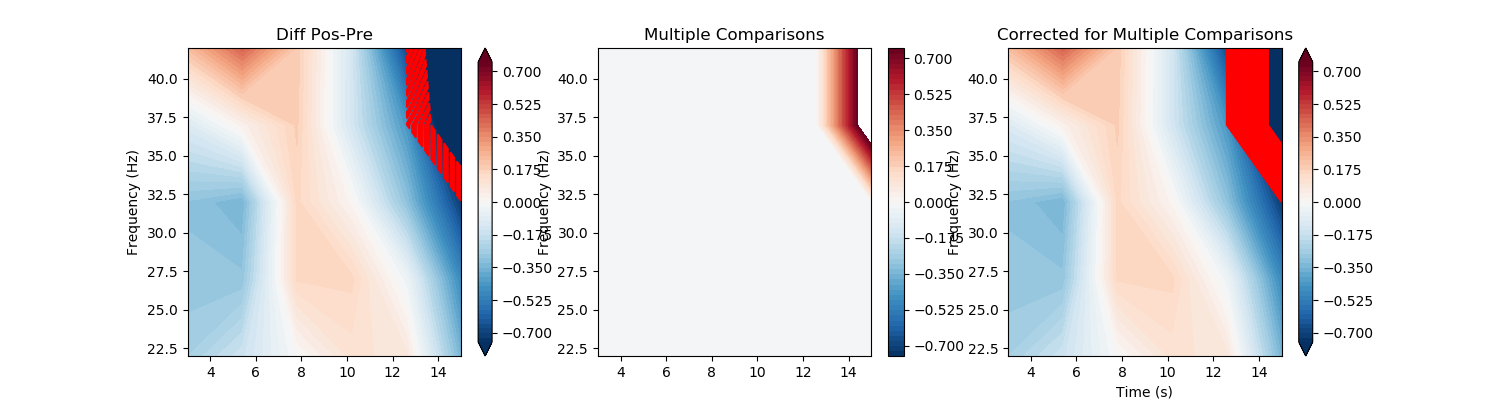

Anti Phase P10 - Baseline :  V1aV5p


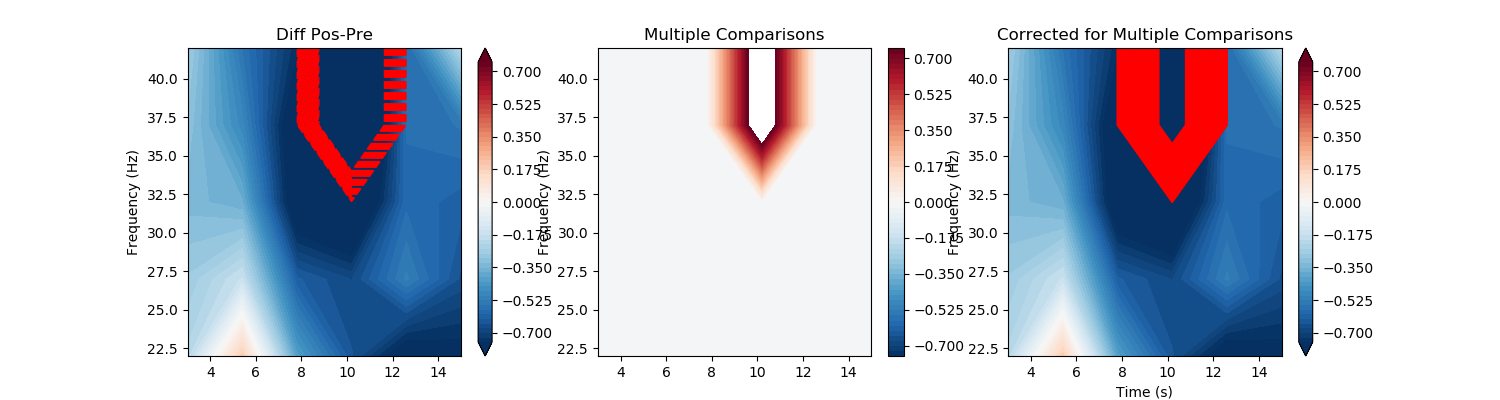

In [69]:
from PIL import Image

img1 = Image.open('../../../Documents/10.19/CrossFr_Sources/Media/Stats_TF_1_CF_G1_P1-Bsl.png')
print('In Phase P10 - Baseline :  V1aV5p')
display(img1)
img2 = Image.open('../../../Documents/10.19/CrossFr_Sources/Media/Stats_TF_1_CF_G2_P1-Bsl.png')
print('Anti Phase P10 - Baseline :  V1aV5p')
display(img2)

NO DIFFERENCE
V1pV5a Pearson r: 0.3486256712036777 and p-value: 0.02365561657713122
V1aV5p Pearson r: 0.12524786272288588 and p-value: 0.4293394804634987


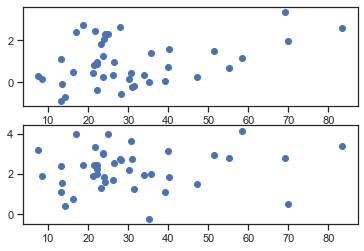

WITH DIFFERENCE
V1pV5a Pearson r: 0.20878202949293478 and p-value: 0.1845396858357068
V1aV5p Pearson r: -0.1307740420135518 and p-value: 0.4090936773163223


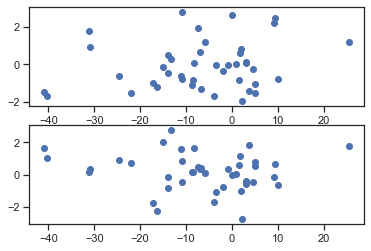

In [5]:
### GLOBAL CORRELATION P30

# B=0 V1pV5a
G1_P30_avg_0 = np.mean(G1_P30[:,2:3,:1,0], axis=(1,2))
G1_P30_avg_0 = np.delete(G1_P30_avg_0, 1)
G2_P30_avg_0 = np.mean(G2_P30[:,2:3,:1,0], axis=(1,2))
G2_P30_avg_0 = np.delete(G2_P30_avg_0, [0,9])
G5_P30_avg_0 = np.mean(G5_P30[:,2:3,:1,0], axis=(1,2))
# B=1 V1aV5p
G1_P30_avg_1 = np.mean(G1_P30[:,0:2,:,1], axis=(1,2))
G1_P30_avg_1 = np.delete(G1_P30_avg_1, 1)
G2_P30_avg_1 = np.mean(G2_P30[:,0:2,:,1], axis=(1,2))
G2_P30_avg_1 = np.delete(G2_P30_avg_1, [0,9])
G5_P30_avg_1 = np.mean(G5_P30[:,0:2,:,1], axis=(1,2))

NDR_G1_P30 = NDR['A_P30']
NDR_G1_P30 = NDR_G1_P30.drop(index=1, inplace=False)
NDR_G2_P30 = NDR['B_P30']
NDR_G2_P30 = NDR_G2_P30.drop(index=[0,9], inplace=False)
NDR_G5_P30 = NDR['E_P30']

x0 = pd.concat([NDR_G1_P30, NDR_G2_P30, NDR_G5_P30])
y0 = np.concatenate((G1_P30_avg_0, G2_P30_avg_0, G5_P30_avg_0), axis=0)

x1 = pd.concat([NDR_G1_P30, NDR_G2_P30, NDR_G5_P30])
y1 = np.concatenate((G1_P30_avg_1, G2_P30_avg_1, G5_P30_avg_1), axis=0)

r0,p0 = scipy.stats.pearsonr(x0, y0)
r1,p1 = scipy.stats.pearsonr(x1, y1)

print('NO DIFFERENCE')
print(f"V1pV5a Pearson r: {r0} and p-value: {p0}")
print(f"V1aV5p Pearson r: {r1} and p-value: {p1}")

plt.subplot(2,1,1)
plt.scatter(x0, y0)
plt.subplot(2,1,2)
plt.scatter(x1, y1)
plt.show()

x2 = pd.concat([NDR_G1_P30-NDR_G1_Bsl, NDR_G2_P30-NDR_G2_Bsl, NDR_G5_P30-NDR_G5_Bsl])
y2 = np.concatenate((G1_P30_avg_0-G1_Bsl_avg_0, G2_P30_avg_0-G2_Bsl_avg_0, G5_P30_avg_0-G5_Bsl_avg_0), axis=0)

x3 = pd.concat([NDR_G1_P30-NDR_G1_Bsl, NDR_G2_P30-NDR_G2_Bsl, NDR_G5_P30-NDR_G5_Bsl])
y3 = np.concatenate((G1_P30_avg_1-G1_Bsl_avg_1, G2_P30_avg_1-G2_Bsl_avg_1, G5_P30_avg_1-G5_Bsl_avg_1), axis=0)

r2,p2 = scipy.stats.pearsonr(x2, y2)
r3,p3 = scipy.stats.pearsonr(x3, y3)

print('WITH DIFFERENCE')
print(f"V1pV5a Pearson r: {r2} and p-value: {p2}")
print(f"V1aV5p Pearson r: {r3} and p-value: {p3}")

plt.subplot(2,1,1)
plt.scatter(x2, y2)
plt.subplot(2,1,2)
plt.scatter(x3, y3)
plt.show()

In Phase P30 - Baseline :  V1pV5a


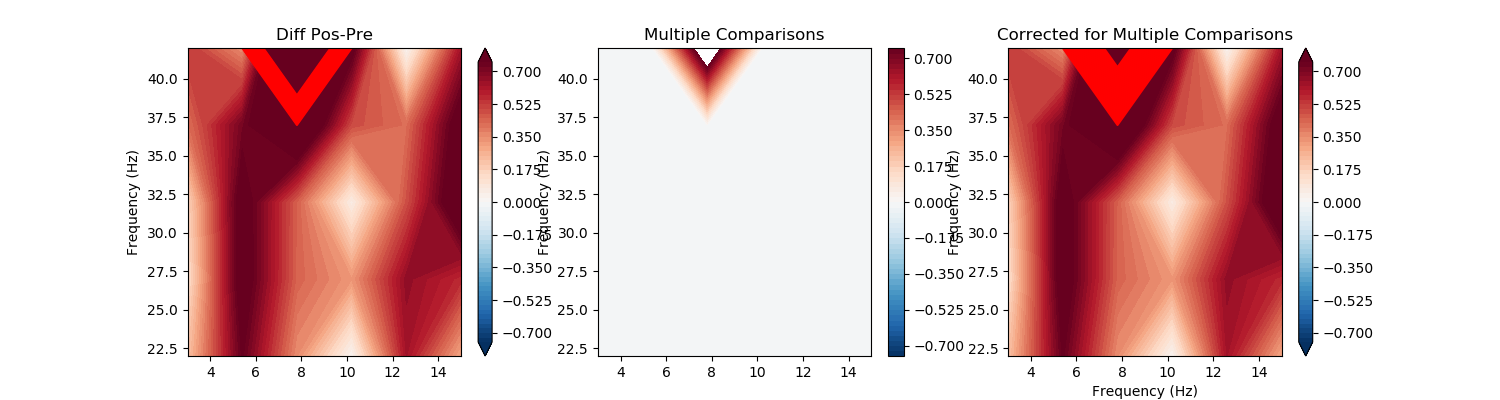

Anti Phase P30 - Baseline :  V1pV5a


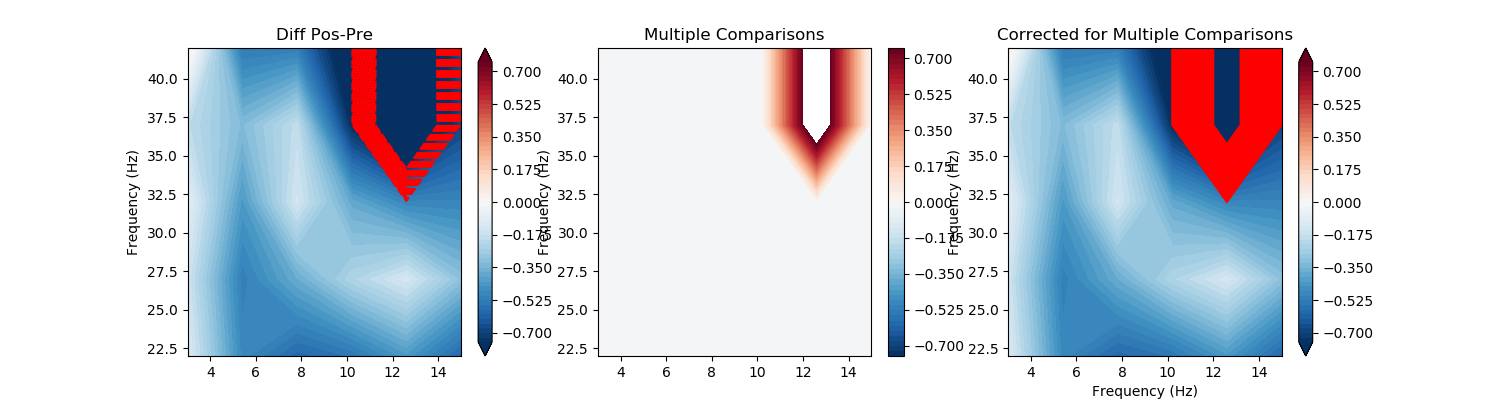

In [77]:
from PIL import Image

img1 = Image.open('../../../Documents/10.19/CrossFr_Sources/Media/Stats_TF_0_CF_G1_P3-Bsl.png')
print('In Phase P30 - Baseline :  V1pV5a')
display(img1)
img2 = Image.open('../../../Documents/10.19/CrossFr_Sources/Media/Stats_TF_0_CF_G2_P3-Bsl.png')
print('Anti Phase P30 - Baseline :  V1pV5a')
display(img2)

WITH DIFFERENCE
In-Phase Pearson r: -0.2576826460848414 and p-value: 0.3737747481614005
Anti-Phase Pearson r: 0.6990200436936513 and p-value: 0.007845501509290382
Sham Pearson r: 0.32801900873365347 and p-value: 0.23264230244953882


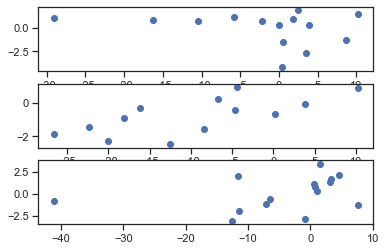

NO DIFFERENCE BASELINE
In-Phase Pearson r: -0.3984535418989666 and p-value: 0.15820679764755075
Anti-Phase Pearson r: 0.03166096055951412 and p-value: 0.9182193032686794
Sham Pearson r: 0.2687024170708096 and p-value: 0.33286181948973453


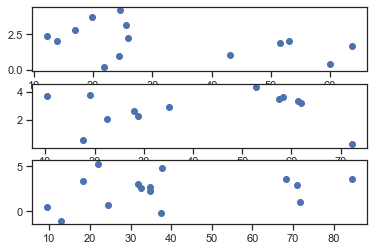

NO DIFFERENCE POST10
In-Phase Pearson r: -0.039792204424496366 and p-value: 0.8925649928424002
Anti-Phase Pearson r: -0.16934808819069191 and p-value: 0.5802013206027307
Sham Pearson r: 0.48898511724974913 and p-value: 0.06434891297501978


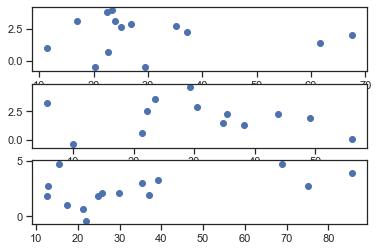

In [6]:
### Decrease C.F. V1aV5p @ P10

# B=1 V1aV5p 1334 vs 2345
G1_Bsl_avg_1 = np.mean(G1_Bsl[:,1:3,3:4,1], axis=(1,2))
G1_Bsl_avg_1 = np.delete(G1_Bsl_avg_1, 1)
G1_P10_avg_1 = np.mean(G1_P10[:,1:3,3:4,1], axis=(1,2))
G1_P10_avg_1 = np.delete(G1_P10_avg_1, 1)

G2_Bsl_avg_1 = np.mean(G2_Bsl[:,1:3,3:4,1], axis=(1,2))
G2_Bsl_avg_1 = np.delete(G2_Bsl_avg_1, [0,9])
G2_P10_avg_1 = np.mean(G2_P10[:,1:3,3:4,1], axis=(1,2))
G2_P10_avg_1 = np.delete(G2_P10_avg_1, [0,9])

G5_Bsl_avg_1 = np.mean(G5_Bsl[:,1:3,3:4,1], axis=(1,2))
G5_P10_avg_1 = np.mean(G5_P10[:,1:3,3:4,1], axis=(1,2))

x0 = NDR_G1_P10 - NDR_G1_Bsl
y0 = G1_P10_avg_1 - G1_Bsl_avg_1

x1 = NDR_G2_P10 - NDR_G2_Bsl
y1 = G2_P10_avg_1 - G2_Bsl_avg_1

x2 = NDR_G5_P10 - NDR_G5_Bsl
y2 = G5_P10_avg_1 - G5_Bsl_avg_1

r0,p0 = scipy.stats.pearsonr(x0, y0)
r1,p1 = scipy.stats.pearsonr(x1, y1)
r2,p2 = scipy.stats.pearsonr(x2, y2)

print('WITH DIFFERENCE')
print(f"In-Phase Pearson r: {r0} and p-value: {p0}")
print(f"Anti-Phase Pearson r: {r1} and p-value: {p1}")
print(f"Sham Pearson r: {r2} and p-value: {p2}")

plt.subplot(3,1,1)
plt.scatter(x0, y0)
plt.subplot(3,1,2)
plt.scatter(x1, y1)
plt.subplot(3,1,3)
plt.scatter(x2, y2)
plt.show()

### Baseline

x3 = NDR_G1_Bsl
y3 = G1_Bsl_avg_1

x4 = NDR_G2_Bsl
y4 = G2_Bsl_avg_1

x5 = NDR_G5_Bsl
y5 = G5_Bsl_avg_1

r3,p3 = scipy.stats.pearsonr(x3, y3)
r4,p4 = scipy.stats.pearsonr(x4, y4)
r5,p5 = scipy.stats.pearsonr(x5, y5)

print('NO DIFFERENCE BASELINE')
print(f"In-Phase Pearson r: {r3} and p-value: {p3}")
print(f"Anti-Phase Pearson r: {r4} and p-value: {p4}")
print(f"Sham Pearson r: {r5} and p-value: {p5}")

plt.subplot(3,1,1)
plt.scatter(x3, y3)
plt.subplot(3,1,2)
plt.scatter(x4, y4)
plt.subplot(3,1,3)
plt.scatter(x5, y5)
plt.show()

### P10

x6 = NDR_G1_P10
y6 = G1_P10_avg_1

x7 = NDR_G2_P10
y7 = G2_P10_avg_1

x8 = NDR_G5_P10
y8 = G5_P10_avg_1

r6,p6 = scipy.stats.pearsonr(x6, y6)
r7,p7 = scipy.stats.pearsonr(x7, y7)
r8,p8 = scipy.stats.pearsonr(x8, y8)

print('NO DIFFERENCE POST10')
print(f"In-Phase Pearson r: {r6} and p-value: {p6}")
print(f"Anti-Phase Pearson r: {r7} and p-value: {p7}")
print(f"Sham Pearson r: {r8} and p-value: {p8}")

plt.subplot(3,1,1)
plt.scatter(x6, y6)
plt.subplot(3,1,2)
plt.scatter(x7, y7)
plt.subplot(3,1,3)
plt.scatter(x8, y8)
plt.show()

In [6]:
### Increase C.F. V1pV5a @ P30

# B=0 V1pV5a 343: vs 2301
G1_Bsl_avg_0 = np.mean(G1_Bsl[:,3:4,3:,0], axis=(1,2))
G1_Bsl_avg_0 = np.delete(G1_Bsl_avg_0, 1)
G1_P30_avg_0 = np.mean(G1_P30[:,3:4,3:,0], axis=(1,2))
G1_P30_avg_0 = np.delete(G1_P30_avg_0, 1)

G2_Bsl_avg_0 = np.mean(G2_Bsl[:,3:4,3:,0], axis=(1,2))
G2_Bsl_avg_0 = np.delete(G2_Bsl_avg_0, [0,9])
G2_P30_avg_0 = np.mean(G2_P30[:,3:4,3:,0], axis=(1,2))
G2_P30_avg_0 = np.delete(G2_P30_avg_0, [0,9])

G5_Bsl_avg_0 = np.mean(G5_Bsl[:,3:4,3:,0], axis=(1,2))
G5_P30_avg_0 = np.mean(G5_P30[:,3:4,3:,0], axis=(1,2))

x0 = NDR_G1_P30 - NDR_G1_Bsl
y0 = G1_P30_avg_0 - G1_Bsl_avg_0

x1 = NDR_G2_P30 - NDR_G2_Bsl
y1 = G2_P30_avg_0 - G2_Bsl_avg_0

x2 = NDR_G5_P30 - NDR_G5_Bsl
y2 = G5_P30_avg_0 - G5_Bsl_avg_0

r0,p0 = scipy.stats.pearsonr(x0, y0)
r1,p1 = scipy.stats.pearsonr(x1, y1)
r2,p2 = scipy.stats.pearsonr(x2, y2)

print('WITH DIFFERENCE')
print(f"In-Phase Pearson r: {r0} and p-value: {p0}")
print(f"Anti-Phase Pearson r: {r1} and p-value: {p1}")
print(f"Sham Pearson r: {r2} and p-value: {p2}")

plt.subplot(3,1,1)
plt.scatter(x0, y0)
plt.subplot(3,1,2)
plt.scatter(x1, y1)
plt.subplot(3,1,3)
plt.scatter(x2, y2)
plt.show()

### Baseline

x3 = NDR_G1_Bsl
y3 = G1_Bsl_avg_0

x4 = NDR_G2_Bsl
y4 = G2_Bsl_avg_0

x5 = NDR_G5_Bsl
y5 = G5_Bsl_avg_0

r3,p3 = scipy.stats.pearsonr(x3, y3)
r4,p4 = scipy.stats.pearsonr(x4, y4)
r5,p5 = scipy.stats.pearsonr(x5, y5)

print('NO DIFFERENCE BASELINE')
print(f"In-Phase Pearson r: {r3} and p-value: {p3}")
print(f"Anti-Phase Pearson r: {r4} and p-value: {p4}")
print(f"Sham Pearson r: {r5} and p-value: {p5}")

plt.subplot(3,1,1)
plt.scatter(x3, y3)
plt.subplot(3,1,2)
plt.scatter(x4, y4)
plt.subplot(3,1,3)
plt.scatter(x5, y5)
plt.show()

### P30

x6 = NDR_G1_P30
y6 = G1_P30_avg_0

x7 = NDR_G2_P30
y7 = G2_P30_avg_0

x8 = NDR_G5_P30
y8 = G5_P30_avg_0

r6,p6 = scipy.stats.pearsonr(x6, y6)
r7,p7 = scipy.stats.pearsonr(x7, y7)
r8,p8 = scipy.stats.pearsonr(x8, y8)

print('NO DIFFERENCE POST30')
print(f"In-Phase Pearson r: {r6} and p-value: {p6}")
print(f"Anti-Phase Pearson r: {r7} and p-value: {p7}")
print(f"Sham Pearson r: {r8} and p-value: {p8}")

plt.subplot(3,1,1)
plt.scatter(x6, y6)
plt.subplot(3,1,2)
plt.scatter(x7, y7)
plt.subplot(3,1,3)
plt.scatter(x8, y8)
plt.show()

NameError: name 'NDR_G1_P30' is not defined

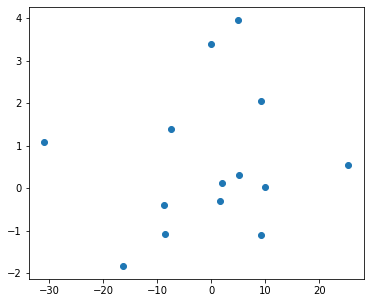

In [39]:
fig1 = plt.figure(figsize=(6, 5))
plt.scatter(x0, y0)
# plt.xlabel('NDR P10-Bsl')
# plt.ylabel('ZPAC P10-Bsl')
fig1.savefig('Correla1')

Correlation C.F. Direction
Direction Pearson r: 0.49337978377091296 and p-value: 0.0009000213163740623
Direction Pearson r: 0.3595534345119539 and p-value: 0.019352808812814763
Direction Pearson r: 0.2881950270276712 and p-value: 0.06419275103045934


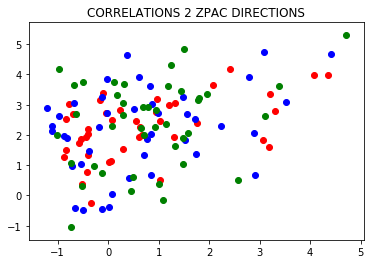

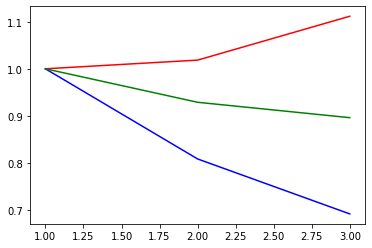

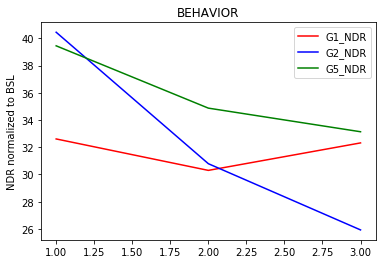

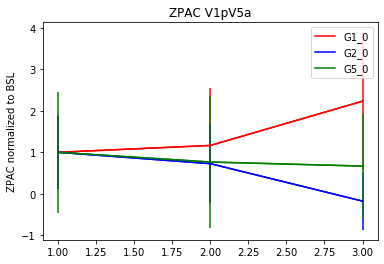

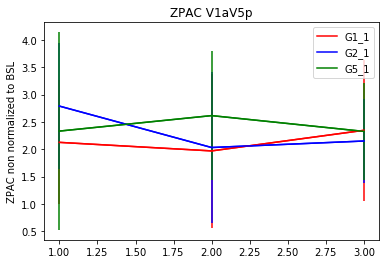

In [5]:
### Are the 2 directions of ZPAC correlated?
xP30 = np.concatenate((G1_P30_avg_0, G2_P30_avg_0, G5_P30_avg_0), axis=0)
xP10 = np.concatenate((G1_P10_avg_0, G2_P10_avg_0, G5_P10_avg_0), axis=0)
xBsl = np.concatenate((G1_Bsl_avg_0, G2_Bsl_avg_0, G5_Bsl_avg_0), axis=0)

yP30 = np.concatenate((G1_P30_avg_1, G2_P30_avg_1, G5_P30_avg_1), axis=0)
yP10 = np.concatenate((G1_P10_avg_1, G2_P10_avg_1, G5_P10_avg_1), axis=0)
yBsl = np.concatenate((G1_Bsl_avg_1, G2_Bsl_avg_1, G5_Bsl_avg_1), axis=0)

r3,p3 = scipy.stats.pearsonr(xP30, yP30)
r2,p2 = scipy.stats.pearsonr(xP10, yP10)
r1,p1 = scipy.stats.pearsonr(xBsl, yBsl)

# colors = np.random.rand(126)
print('Correlation C.F. Direction')
print(f"Direction Pearson r: {r3} and p-value: {p3}")
print(f"Direction Pearson r: {r2} and p-value: {p2}")
print(f"Direction Pearson r: {r1} and p-value: {p1}")

plt.figure()
plt.scatter(xP30, yP30, c='r')
plt.scatter(xP10, yP10, c='b')
plt.scatter(xBsl, yBsl, c='g')
plt.title('CORRELATIONS 2 ZPAC DIRECTIONS')

### Behavioral Results over time
G1_P30_avg_NDR = np.mean(NDR_G1_P30, axis=0)
G1_P10_avg_NDR = np.mean(NDR_G1_P10, axis=0)
G1_Bsl_avg_NDR = np.mean(NDR_G1_Bsl, axis=0)
G2_P30_avg_NDR = np.mean(NDR_G2_P30, axis=0)
G2_P10_avg_NDR = np.mean(NDR_G2_P10, axis=0)
G2_Bsl_avg_NDR = np.mean(NDR_G2_Bsl, axis=0)
G5_P30_avg_NDR = np.mean(NDR_G5_P30, axis=0)
G5_P10_avg_NDR = np.mean(NDR_G5_P10, axis=0)
G5_Bsl_avg_NDR = np.mean(NDR_G5_Bsl, axis=0)

G1_P30_avg_NDR_n = NDR_G1_P30/NDR_G1_Bsl
G1_P10_avg_NDR_n = NDR_G1_P10/NDR_G1_Bsl
G1_Bsl_avg_NDR_n = NDR_G1_Bsl/NDR_G1_Bsl
G2_P30_avg_NDR_n = NDR_G2_P30/NDR_G2_Bsl
G2_P10_avg_NDR_n = NDR_G2_P10/NDR_G2_Bsl
G2_Bsl_avg_NDR_n = NDR_G2_Bsl/NDR_G2_Bsl
G5_P30_avg_NDR_n = NDR_G5_P30/NDR_G5_Bsl
G5_P10_avg_NDR_n = NDR_G5_P10/NDR_G5_Bsl
G5_Bsl_avg_NDR_n = NDR_G5_Bsl/NDR_G5_Bsl

plt.figure()
# plt.plot([1,2,3],[G1_Bsl_avg_NDR/G1_Bsl_avg_NDR,G1_P10_avg_NDR/G1_Bsl_avg_NDR,G1_P30_avg_NDR/G1_Bsl_avg_NDR], c='r', label="G1_NDR")
# plt.plot([1,2,3],[G2_Bsl_avg_NDR/G2_Bsl_avg_NDR,G2_P10_avg_NDR/G2_Bsl_avg_NDR,G2_P30_avg_NDR/G2_Bsl_avg_NDR], c='b', label="G2_NDR")
# plt.plot([1,2,3],[G5_Bsl_avg_NDR/G5_Bsl_avg_NDR,G5_P10_avg_NDR/G5_Bsl_avg_NDR,G5_P30_avg_NDR/G5_Bsl_avg_NDR], c='g', label="G5_NDR")
plt.plot([1,2,3],[np.mean(G1_Bsl_avg_NDR_n),np.mean(G1_P10_avg_NDR_n),np.mean(G1_P30_avg_NDR_n)], c='r', label="G1_NDR")
plt.plot([1,2,3],[np.mean(G2_Bsl_avg_NDR_n),np.mean(G2_P10_avg_NDR_n),np.mean(G2_P30_avg_NDR_n)], c='b', label="G2_NDR")
plt.plot([1,2,3],[np.mean(G5_Bsl_avg_NDR_n),np.mean(G5_P10_avg_NDR_n),np.mean(G5_P30_avg_NDR_n)], c='g', label="G5_NDR")
plt.figure()
plt.plot([1,2,3],[G1_Bsl_avg_NDR,G1_P10_avg_NDR,G1_P30_avg_NDR], c='r', label="G1_NDR")
plt.plot([1,2,3],[G2_Bsl_avg_NDR,G2_P10_avg_NDR,G2_P30_avg_NDR], c='b', label="G2_NDR")
plt.plot([1,2,3],[G5_Bsl_avg_NDR,G5_P10_avg_NDR,G5_P30_avg_NDR], c='g', label="G5_NDR")
plt.title('BEHAVIOR')
plt.ylabel('NDR normalized to BSL')
plt.legend()

### Coupling Results over time
G1_P30_avg0 = np.mean(xP30[:13], axis=0)
G1_P10_avg0 = np.mean(xP10[:13], axis=0)
G1_Bsl_avg0 = np.mean(xBsl[:13], axis=0)
G2_P30_avg0 = np.mean(xP30[14:27], axis=0)
G2_P10_avg0 = np.mean(xP10[14:27], axis=0)
G2_Bsl_avg0 = np.mean(xBsl[14:27], axis=0)
G5_P30_avg0 = np.mean(xP30[28:], axis=0)
G5_P10_avg0 = np.mean(xP10[28:], axis=0)
G5_Bsl_avg0 = np.mean(xBsl[28:], axis=0)

G1_P30_avg1 = np.mean(yP30[:13], axis=0)
G1_P10_avg1 = np.mean(yP10[:13], axis=0)
G1_Bsl_avg1 = np.mean(yBsl[:13], axis=0)
G2_P30_avg1 = np.mean(yP30[14:27], axis=0)
G2_P10_avg1 = np.mean(yP10[14:27], axis=0)
G2_Bsl_avg1 = np.mean(yBsl[14:27], axis=0)
G5_P30_avg1 = np.mean(yP30[28:], axis=0)
G5_P10_avg1 = np.mean(yP10[28:], axis=0)
G5_Bsl_avg1 = np.mean(yBsl[28:], axis=0)

G1_P30_avg0_std = np.std(xP30[:13])
G1_P10_avg0_std = np.std(xP10[:13])
G1_Bsl_avg0_std = np.std(xBsl[:13])
G2_P30_avg0_std = np.std(xP30[14:27])
G2_P10_avg0_std = np.std(xP10[14:27])
G2_Bsl_avg0_std = np.std(xBsl[14:27])
G5_P30_avg0_std = np.std(xP30[28:])
G5_P10_avg0_std = np.std(xP10[28:])
G5_Bsl_avg0_std = np.std(xBsl[28:])

G1_P30_avg1_std = np.std(yP30[:13])
G1_P10_avg1_std = np.std(yP10[:13])
G1_Bsl_avg1_std = np.std(yBsl[:13])
G2_P30_avg1_std = np.std(yP30[14:27])
G2_P10_avg1_std = np.std(yP10[14:27])
G2_Bsl_avg1_std = np.std(yBsl[14:27])
G5_P30_avg1_std = np.std(yP30[28:])
G5_P10_avg1_std = np.std(yP10[28:])
G5_Bsl_avg1_std = np.std(yBsl[28:])

plt.figure()
plt.plot([1,2,3],[G1_Bsl_avg0/G1_Bsl_avg0,G1_P10_avg0/G1_Bsl_avg0,G1_P30_avg0/G1_Bsl_avg0], c='r', label="G1_0")
plt.plot([1,2,3],[G2_Bsl_avg0/G2_Bsl_avg0,G2_P10_avg0/G2_Bsl_avg0,G2_P30_avg0/G2_Bsl_avg0], c='b', label="G2_0")
plt.plot([1,2,3],[G5_Bsl_avg0/G5_Bsl_avg0,G5_P10_avg0/G5_Bsl_avg0,G5_P30_avg0/G5_Bsl_avg0], c='g', label="G5_0")
# plt.plot([1,2,3],[G1_Bsl_avg0,G1_P10_avg0,G1_P30_avg0], c='r', label="G1_0")
# plt.plot([1,2,3],[G2_Bsl_avg0,G2_P10_avg0,G2_P30_avg0], c='b', label="G2_0")
# plt.plot([1,2,3],[G5_Bsl_avg0,G5_P10_avg0,G5_P30_avg0], c='g', label="G5_0")
plt.errorbar([1,2,3],[G1_Bsl_avg0/G1_Bsl_avg0,G1_P10_avg0/G1_Bsl_avg0,G1_P30_avg0/G1_Bsl_avg0], yerr=[G1_Bsl_avg0_std, G1_P10_avg0_std, G1_P30_avg0_std], c='r')
plt.errorbar([1,2,3],[G2_Bsl_avg0/G2_Bsl_avg0,G2_P10_avg0/G2_Bsl_avg0,G2_P30_avg0/G2_Bsl_avg0], yerr=[G2_Bsl_avg0_std, G2_P10_avg0_std, G2_P30_avg0_std], c='b')
plt.errorbar([1,2,3],[G5_Bsl_avg0/G5_Bsl_avg0,G5_P10_avg0/G5_Bsl_avg0,G5_P30_avg0/G5_Bsl_avg0], yerr=[G5_Bsl_avg0_std, G5_P10_avg0_std, G5_P30_avg0_std], c='g')
plt.title('ZPAC V1pV5a')
plt.ylabel('ZPAC normalized to BSL')
plt.legend()

plt.figure()
# plt.plot([1,2,3],[G1_Bsl_avg1/G1_Bsl_avg1,G1_P10_avg1/G1_Bsl_avg1,G1_P30_avg1/G1_Bsl_avg1], c='r', label="G1_1")
# plt.plot([1,2,3],[G2_Bsl_avg1/G2_Bsl_avg1,G2_P10_avg1/G2_Bsl_avg1,G2_P30_avg1/G2_Bsl_avg1], c='b', label="G2_1")
# plt.plot([1,2,3],[G5_Bsl_avg1/G5_Bsl_avg1,G5_P10_avg1/G5_Bsl_avg1,G5_P30_avg1/G5_Bsl_avg1], c='g', label="G5_1")
plt.plot([1,2,3],[G1_Bsl_avg1,G1_P10_avg1,G1_P30_avg1], c='r', label="G1_1")
plt.plot([1,2,3],[G2_Bsl_avg1,G2_P10_avg1,G2_P30_avg1], c='b', label="G2_1")
plt.plot([1,2,3],[G5_Bsl_avg1,G5_P10_avg1,G5_P30_avg1], c='g', label="G5_1")
# plt.errorbar([1,2,3],[G1_Bsl_avg1/G1_Bsl_avg1,G1_P10_avg1/G1_Bsl_avg1,G1_P30_avg1/G1_Bsl_avg1], yerr=[G1_Bsl_avg1_std, G1_P10_avg1_std, G1_P30_avg1_std], c='r')
# plt.errorbar([1,2,3],[G2_Bsl_avg1/G2_Bsl_avg1,G2_P10_avg1/G2_Bsl_avg1,G2_P30_avg1/G2_Bsl_avg1], yerr=[G2_Bsl_avg1_std, G2_P10_avg1_std, G2_P30_avg1_std], c='b')
# plt.errorbar([1,2,3],[G5_Bsl_avg1/G5_Bsl_avg1,G5_P10_avg1/G5_Bsl_avg1,G5_P30_avg1/G5_Bsl_avg1], yerr=[G5_Bsl_avg1_std, G5_P10_avg1_std, G5_P30_avg1_std], c='g')
plt.errorbar([1,2,3],[G1_Bsl_avg1,G1_P10_avg1,G1_P30_avg1], yerr=[G1_Bsl_avg1_std, G1_P10_avg1_std, G1_P30_avg1_std], c='r')
plt.errorbar([1,2,3],[G2_Bsl_avg1,G2_P10_avg1,G2_P30_avg1], yerr=[G2_Bsl_avg1_std, G2_P10_avg1_std, G2_P30_avg1_std], c='b')
plt.errorbar([1,2,3],[G5_Bsl_avg1,G5_P10_avg1,G5_P30_avg1], yerr=[G5_Bsl_avg1_std, G5_P10_avg1_std, G5_P30_avg1_std], c='g')
plt.title('ZPAC V1aV5p')
plt.ylabel('ZPAC non normalized to BSL')
plt.legend()



In [2]:
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels

NDR = pd.read_excel('Raw_NDR.xlsx', 'Sheet2')

NDR_G1_Bsl = NDR['A_Bsl']
NDR_G1_Bsl = NDR_G1_Bsl.drop(index=1, inplace=False)
NDR_G2_Bsl = NDR['B_Bsl']
NDR_G2_Bsl = NDR_G2_Bsl.drop(index=[0,9], inplace=False)
NDR_G5_Bsl = NDR['E_Bsl']

NDR_G1_ACS = NDR['A_tACS']
NDR_G1_ACS = NDR_G1_ACS.drop(index=1, inplace=False)
NDR_G2_ACS = NDR['B_tACS']
NDR_G2_ACS = NDR_G2_ACS.drop(index=[0,9], inplace=False)
NDR_G5_ACS = NDR['E_tACS']

NDR_G1_P10 = NDR['A_P10']
NDR_G1_P10 = NDR_G1_P10.drop(index=1, inplace=False)
NDR_G2_P10 = NDR['B_P10']
NDR_G2_P10 = NDR_G2_P10.drop(index=[0,9], inplace=False)
NDR_G5_P10 = NDR['E_P10']

NDR_G1_P30 = NDR['A_P30']
NDR_G1_P30 = NDR_G1_P30.drop(index=1, inplace=False)
NDR_G2_P30 = NDR['B_P30']
NDR_G2_P30 = NDR_G2_P30.drop(index=[0,9], inplace=False)
NDR_G5_P30 = NDR['E_P30']


G1_P30_avg_1 = np.mean(G1_P30[:,0:2,:,1], axis=(1,2))
G1_P30_avg_1 = np.delete(G1_P30_avg_1, 1)
G2_P30_avg_1 = np.mean(G2_P30[:,0:2,:,1], axis=(1,2))
G2_P30_avg_1 = np.delete(G2_P30_avg_1, [0,9])
G5_P30_avg_1 = np.mean(G5_P30[:,0:2,:,1], axis=(1,2))

G1_Bsl_avg_1 = np.mean(G1_Bsl[:,1:3,3:4,1], axis=(1,2))
G1_Bsl_avg_1 = np.delete(G1_Bsl_avg_1, 1)
G1_P10_avg_1 = np.mean(G1_P10[:,1:3,3:4,1], axis=(1,2))
G1_P10_avg_1 = np.delete(G1_P10_avg_1, 1)

G2_Bsl_avg_1 = np.mean(G2_Bsl[:,1:3,3:4,1], axis=(1,2))
G2_Bsl_avg_1 = np.delete(G2_Bsl_avg_1, [0,9])
G2_P10_avg_1 = np.mean(G2_P10[:,1:3,3:4,1], axis=(1,2))
G2_P10_avg_1 = np.delete(G2_P10_avg_1, [0,9])

G5_Bsl_avg_1 = np.mean(G5_Bsl[:,1:3,3:4,1], axis=(1,2))
G5_P10_avg_1 = np.mean(G5_P10[:,1:3,3:4,1], axis=(1,2))


G1_P10_avg_0 = np.mean(G1_P10[:,2:4,3:5,0], axis=(1,2))
G1_P10_avg_0 = np.delete(G1_P10_avg_0, 1)
G2_P10_avg_0 = np.mean(G2_P10[:,2:4,3:5,0], axis=(1,2))
G2_P10_avg_0 = np.delete(G2_P10_avg_0, [0,9])
G5_P10_avg_0 = np.mean(G5_P10[:,2:4,3:5,0], axis=(1,2))

G1_Bsl_avg_0 = np.mean(G1_Bsl[:,3:4,3:,0], axis=(1,2))
G1_Bsl_avg_0 = np.delete(G1_Bsl_avg_0, 1)
G1_P30_avg_0 = np.mean(G1_P30[:,3:4,3:,0], axis=(1,2))
G1_P30_avg_0 = np.delete(G1_P30_avg_0, 1)

G2_Bsl_avg_0 = np.mean(G2_Bsl[:,3:4,3:,0], axis=(1,2))
G2_Bsl_avg_0 = np.delete(G2_Bsl_avg_0, [0,9])
G2_P30_avg_0 = np.mean(G2_P30[:,3:4,3:,0], axis=(1,2))
G2_P30_avg_0 = np.delete(G2_P30_avg_0, [0,9])

G5_Bsl_avg_0 = np.mean(G5_Bsl[:,3:4,3:,0], axis=(1,2))
G5_P30_avg_0 = np.mean(G5_P30[:,3:4,3:,0], axis=(1,2))


In [20]:
### Non-normalized

ndr_all = pd.concat([NDR_G1_Bsl, NDR_G2_Bsl, NDR_G5_Bsl, NDR_G1_Bsl, NDR_G2_Bsl, NDR_G5_Bsl,
                     NDR_G1_ACS, NDR_G2_ACS, NDR_G5_ACS, NDR_G1_ACS, NDR_G2_ACS, NDR_G5_ACS,
                     NDR_G1_P10, NDR_G2_P10, NDR_G5_P10, NDR_G1_P10, NDR_G2_P10, NDR_G5_P10,
                     NDR_G1_P30, NDR_G2_P30, NDR_G5_P30, NDR_G1_P30, NDR_G2_P30, NDR_G5_P30], axis=0)
ndr = ndr_all.reset_index(drop=True)

G5_ACS_avg = np.full(G5_Bsl_avg_0.shape, np.nan)
G2_ACS_avg = np.full(G2_Bsl_avg_0.shape, np.nan)
G1_ACS_avg = np.full(G1_Bsl_avg_0.shape, np.nan)
zpac_all = np.concatenate([G1_Bsl_avg_0, G2_Bsl_avg_0, G5_Bsl_avg_0, G1_Bsl_avg_1, G2_Bsl_avg_1, G5_Bsl_avg_1,
                           G1_ACS_avg, G2_ACS_avg, G5_ACS_avg, G1_ACS_avg, G2_ACS_avg, G5_ACS_avg,
                           G1_P10_avg_0, G2_P10_avg_0, G5_P10_avg_0, G1_P10_avg_1, G2_P10_avg_1, G5_P10_avg_1,
                           G1_P30_avg_0, G2_P30_avg_0, G5_P30_avg_0, G1_P30_avg_1, G2_P30_avg_1, G5_P30_avg_1], axis=0)
zpac = pd.Series(zpac_all)
zpac = zpac.reset_index(drop=True)

orient0 = [0 for number in range(42)] #'V1pV5a'
orient1 = [1 for number in range(42)] #'V1aV5p'
# orient0 = ['V1pV5a' for number in range(42)] #'V1pV5a'
# orient1 = ['V1aV5p' for number in range(42)] #'V1aV5p'
orientation = orient0+orient1+orient0+orient1+orient0+orient1+orient0+orient1
orient = pd.DataFrame(orientation, columns=['ORIENT'])
orient = orient.reset_index(drop=True)

s1 = [number+1 for number in range(14)] #G1
s2 = [number+15 for number in range(13)] #G2
s5 = [number+28 for number in range(15)] #G5
subjects = s1+s2+s5+s1+s2+s5+s1+s2+s5+s1+s2+s5+s1+s2+s5+s1+s2+s5+s1+s2+s5+s1+s2+s5
subject = pd.DataFrame(subjects, columns=['SUBJECT']) 
subject = subject.reset_index(drop=True)

G1 = [1 for number in range(14)] #G1
G2 = [2 for number in range(13)] #G2
G5 = [5 for number in range(15)] #G5
# G1 = ['InPhase' for number in range(14)] #G1
# G2 = ['AntiPhase' for number in range(13)] #G2
# G5 = ['Sham' for number in range(15)] #G5
groups = G1+G2+G5+G1+G2+G5+G1+G2+G5+G1+G2+G5+G1+G2+G5+G1+G2+G5+G1+G2+G5+G1+G2+G5
group = pd.DataFrame(groups, columns=['GROUP']) 
group = group.reset_index(drop=True)

Bsl = [10 for number in range(84)] #'Bsl'
ACS = [5 for number in range(84)] #'tACS'
P10 = [0 for number in range(84)] #'P10'
P30 = [30 for number in range(84)] #'P30'
# Bsl = ["Baseline" for number in range(84)] #'Bsl'
# ACS = ["tACS" for number in range(84)] #'tACS'
# P10 = ["TP10" for number in range(84)] #'P10'
# P30 = ["TP30" for number in range(84)] #'P30'
timepoint = Bsl+ACS+P10+P30
timep = pd.DataFrame(timepoint, columns=['TIMEP'])
timep = timep.reset_index(drop=True)

Mixed_mod = pd.concat([ndr, zpac, orient, subject, group, timep], axis=1)
Mixed_mod.rename(columns={0:'NDR', 1:'ZPAC'}, inplace=True)
#print(Mixed_mod)

Mixed_mod.to_csv('Mixed_mod.txt', sep='\t')

In [4]:
### Normalized

ndr_all_n = pd.concat([NDR_G1_Bsl/NDR_G1_Bsl, NDR_G2_Bsl/NDR_G2_Bsl, NDR_G5_Bsl/NDR_G5_Bsl, NDR_G1_Bsl/NDR_G1_Bsl, NDR_G2_Bsl/NDR_G2_Bsl, NDR_G5_Bsl/NDR_G5_Bsl,
                     NDR_G1_ACS/NDR_G1_Bsl, NDR_G2_ACS/NDR_G2_Bsl, NDR_G5_ACS/NDR_G5_Bsl, NDR_G1_ACS/NDR_G1_Bsl, NDR_G2_ACS/NDR_G2_Bsl, NDR_G5_ACS/NDR_G5_Bsl,
                     NDR_G1_P10/NDR_G1_Bsl, NDR_G2_P10/NDR_G2_Bsl, NDR_G5_P10/NDR_G5_Bsl, NDR_G1_P10/NDR_G1_Bsl, NDR_G2_P10/NDR_G2_Bsl, NDR_G5_P10/NDR_G5_Bsl,
                     NDR_G1_P30/NDR_G1_Bsl, NDR_G2_P30/NDR_G2_Bsl, NDR_G5_P30/NDR_G5_Bsl, NDR_G1_P30/NDR_G1_Bsl, NDR_G2_P30/NDR_G2_Bsl, NDR_G5_P30/NDR_G5_Bsl], axis=0)
ndr_n = ndr_all_n.reset_index(drop=True)

zpac_all_n = np.concatenate([G1_Bsl_avg_0/G1_Bsl_avg_0, G2_Bsl_avg_0/G2_Bsl_avg_0, G5_Bsl_avg_0/G5_Bsl_avg_0, G1_Bsl_avg_1/G1_Bsl_avg_1, G2_Bsl_avg_1/G2_Bsl_avg_1, G5_Bsl_avg_1/G5_Bsl_avg_1,
                           G1_ACS_avg/G1_Bsl_avg_0, G2_ACS_avg/G2_Bsl_avg_0, G5_ACS_avg/G5_Bsl_avg_0, G1_ACS_avg/G1_Bsl_avg_1, G2_ACS_avg/G2_Bsl_avg_1, G5_ACS_avg/G5_Bsl_avg_1,
                           G1_P10_avg_0/G1_Bsl_avg_0, G2_P10_avg_0/G2_Bsl_avg_0, G5_P10_avg_0/G5_Bsl_avg_0, G1_P10_avg_1/G1_Bsl_avg_1, G2_P10_avg_1/G2_Bsl_avg_1, G5_P10_avg_1/G5_Bsl_avg_1,
                           G1_P30_avg_0/G1_Bsl_avg_0, G2_P30_avg_0/G2_Bsl_avg_0, G5_P30_avg_0/G5_Bsl_avg_0, G1_P30_avg_1/G1_Bsl_avg_1, G2_P30_avg_1/G2_Bsl_avg_1, G5_P30_avg_1/G5_Bsl_avg_1], axis=0)
zpac_n = pd.Series(zpac_all_n)
zpac_n = zpac_n.reset_index(drop=True)

Mixed_mod_n = pd.concat([ndr_n, zpac_n, orient, subject, group, timep], axis=1)
Mixed_mod_n.rename(columns={0:'NDR', 1:'ZPAC'}, inplace=True)
pd.set_option('display.max_rows', 400)
print(Mixed_mod_n)

### Dropping values coming from the Lasso for the NDR MLM 
# Mixed_mod_n.drop(index=[184,253], axis=1, inplace= True) #ORIENT0:184,253  ORIENT1:301 

Mixed_mod_n.to_csv('Mixed_mod_norm.txt', sep='\t')

          NDR       ZPAC  ORIENT  SUBJECT  GROUP  TIMEP
0    1.000000   1.000000       0        1      1      0
1    1.000000   1.000000       0        2      1      0
2    1.000000   1.000000       0        3      1      0
3    1.000000   1.000000       0        4      1      0
4    1.000000   1.000000       0        5      1      0
5    1.000000   1.000000       0        6      1      0
6    1.000000   1.000000       0        7      1      0
7    1.000000   1.000000       0        8      1      0
8    1.000000   1.000000       0        9      1      0
9    1.000000   1.000000       0       10      1      0
10   1.000000   1.000000       0       11      1      0
11   1.000000   1.000000       0       12      1      0
12   1.000000   1.000000       0       13      1      0
13   1.000000   1.000000       0       14      1      0
14   1.000000   1.000000       0       15      2      0
15   1.000000   1.000000       0       16      2      0
16   1.000000   1.000000       0       17      2

In [21]:
timep = Mixed_mod.groupby(Mixed_mod['TIMEP']).groups
Bsl_index = timep[0].values
ACS_index = timep[5].values
P10_index = timep[10].values
P30_index = timep[30].values

stim = Mixed_mod.groupby(Mixed_mod['GROUP']).groups
G1_index = stim[1].values
G2_index = stim[2].values
G5_index = stim[5].values

orient = Mixed_mod.groupby(Mixed_mod['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values

# For normalized data without taking Baseline timepoint
Or0 = np.intersect1d((np.concatenate([ACS_index, P10_index, P30_index])),zero_index)
Or1 = np.intersect1d((np.concatenate([ACS_index, P10_index, P30_index])),one_index)

# For normalized data & each GROUP + without taking Baseline timepoint
G10_t = np.intersect1d(zero_index,G1_index)
G20_t = np.intersect1d(zero_index,G2_index)
G50_t = np.intersect1d(zero_index,G5_index)
print(G20_t)

za= np.concatenate([Bsl_index, P10_index, P30_index])

# G1_Bsl_zero = orient['V1pV5a'].intersection(stim['G1']).intersection(timep['Bsl']).values
# model_G1_P30_0 = sm.OLS.from_formula("NDR ~ ZPAC", Mixed_mod.loc[G1_P30_zero])
# result_G1_P30_0 = model_G1_P30_0.fit()
# prstd10, iv_l10, iv_u10 = wls_prediction_std(result_G1_P30_0)


[ 14  15  16  17  18  19  20  21  22  23  24  25  26  98  99 100 101 102
 103 104 105 106 107 108 109 110 182 183 184 185 186 187 188 189 190 191
 192 193 194 266 267 268 269 270 271 272 273 274 275 276 277 278]


In [4]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels

pd.set_option('display.max_rows', 200)
df_zp = pd.read_csv('Mixed_mod_norm.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
print(len(df_zp))

orient = df_zp.groupby(df_zp['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values

df_zp.drop(df_zp.index[zero_index], axis=0, inplace= True) ### To be changed depending on the orientation
df_zp.reset_index(drop=True, inplace=True)
print(len(df_zp))

timep = df_zp.groupby(df_zp['TIMEP']).groups
Bas = timep[0].values   #### When data is normalized
tACS = timep[5].values
df_zp.drop(df_zp.index[tACS], axis=0, inplace= True)
df_zp.drop(df_zp.index[Bas], axis=0, inplace= True)
df_zp.reset_index(drop=True, inplace=True)
print(len(df_zp))

df_zp.drop(['ORIENT'], axis=1, inplace= True)
df_zp.reset_index(drop=True, inplace=True)
# print(df_zp)

### Dropping values coming from the Lasso for the ZPAC MLM 32
df_zp.drop(index=[16,43], axis=1, inplace= True) ## ORIENT0:16,43  ORIENT1:49 --> To be changed depending on the orientation
df_zp.reset_index(drop=True, inplace=True)
print(len(df_zp))

# model_1_zp = sm.MixedLM.from_formula('ZPAC ~ C(TIMEP)', df_zp,
#                                 groups=df_zp['SUBJECT'], missing='drop')
# result_1_zp = model_1_zp.fit()
# print(result_1_zp.summary())
# results_1_summary = result_1_zp.summary()
# results_1_summary.tables[1].to_csv('ZPAC_nor_1_T_521_3010', index=True)
# # plt.figure()
# # plt.subplot(2,2,1)
# # pd.Series.hist(result_1_zp.resid[:])
# # k1, p1 = stats.normaltest(result_1_zp.resid[:])
# # print(k1,p1)

# model_2_zp = sm.MixedLM.from_formula('ZPAC ~ C(TIMEP)+C(GROUP)', df_zp,
#                                 groups=df_zp['SUBJECT'], missing='drop')
# result_2_zp = model_2_zp.fit()
# print(result_2_zp.summary())
# results_2_summary = result_2_zp.summary()
# results_2_summary.tables[1].to_csv('ZPAC_nor_1_TG_521_3010', index=True)
# plt.subplot(2,2,2)
# pd.Series.hist(result_2_zp.resid[:])
# k2, p2 = stats.normaltest(result_2_zp.resid[:])
# print(k2,p2)

# model_3_zp = sm.MixedLM.from_formula('ZPAC ~ C(TIMEP)+C(GROUP)+NDR', df_zp,
#                                 groups=df_zp['SUBJECT'], missing='drop')
# result_3_zp = model_3_zp.fit()
# print(result_3_zp.summary())
# results_3_summary = result_3_zp.summary()
# results_3_summary.tables[1].to_csv('ZPAC_nor_1_TGN_521_3010', index=True)
# # plt.subplot(2,2,3)
# # pd.Series.hist(result_3_zp.resid[:])
# # k3, p3 = stats.normaltest(result_3_zp.resid[:])
# # print(k3,p3)

# model_4_zp = sm.MixedLM.from_formula('ZPAC ~ C(TIMEP)+C(GROUP)*NDR', df_zp,
#                                 groups=df_zp['SUBJECT'], missing='drop')
# result_4_zp = model_4_zp.fit()
# print(result_4_zp.summary())
# results_4_summary = result_4_zp.summary()
# results_4_summary.tables[1].to_csv('ZPAC_nor_1_TG-N_521_3010', index=True)
# plt.subplot(2,2,4)
# pd.Series.hist(result_4_zp.resid[:])
# k4, p4 = stats.normaltest(result_4_zp.resid[:])
# print(k4,p4)

336
168
166
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ZPAC     
No. Observations: 125     Method:             REML     
No. Groups:       42      Scale:              1.1890   
Min. group size:  2       Log-Likelihood:     -206.0426
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
               Coef. Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept      2.027    0.293 6.925 0.000  1.453  2.601
C(TIMEP)[T.10] 0.221    0.240 0.921 0.357 -0.249  0.691
C(TIMEP)[T.30] 0.082    0.238 0.346 0.729 -0.384  0.549
C(GROUP)[T.2]  0.201    0.374 0.538 0.591 -0.531  0.933
C(GROUP)[T.5]  0.228    0.359 0.635 0.526 -0.476  0.932
Group Var      0.538    0.236                          



/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [24]:
model_1 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)', Mixed_mod.loc[G10_t],
                                groups=Mixed_mod.loc[G10_t]['SUBJECT'], missing='drop')#, re_formula='~C(TIMEP)')# Mixed_mod.loc[zero_index]
result_1 = model_1.fit(method='lbfgs')
print(result_1.summary())
results_1_summary = result_1.summary()
results_1_summary.tables[1].to_csv('NDR_0_T_1_105030', index=True) #NDR_nor_1_T_125_30100
# plt.figure()
# plt.subplot(2,2,1)
# pd.Series.hist(result_1.resid[:])
# k1, p1 = stats.normaltest(result_1.resid[:])
# print(k1,p1)

# model_2 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)', Mixed_mod.loc[zero_index],
#                                 groups=Mixed_mod.loc[zero_index]['SUBJECT'], missing='drop')#, re_formula='~C(TIMEP)')
# result_2 = model_2.fit(method='lbfgs')
# print(result_2.summary())
# results_2_summary = result_2.summary()
# results_2_summary.tables[1].to_csv('NDR_0_TG_521_105030', index=True)
# plt.subplot(2,2,2)
# pd.Series.hist(result_2.resid[:])
# k2, p2 = stats.normaltest(result_2.resid[:])
# print(k2,p2)

# model_3 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+ZPAC', Mixed_mod_n.loc[Or1],
#                                 groups=Mixed_mod_n.loc[Or1]['SUBJECT'], missing='drop')
# result_3 = model_3.fit(method='lbfgs')
# print(result_3.summary())
# # plt.subplot(2,2,3)
# # pd.Series.hist(result_3.resid[:])
# # k3, p3 = stats.normaltest(result_3.resid[:])
# # print(k3,p3)
# results_3_summary = result_3.summary()
# results_3_summary.tables[1].to_csv('NDR_nor_1_TGZ_125_30100', index=True)

# model_4 = sm.MixedLM.from_formula('NDR ~ C(TIMEP)+C(GROUP)+ZPAC*C(GROUP)', Mixed_mod_n.loc[Or1],
#                                 groups=Mixed_mod_n.loc[Or1]['SUBJECT'], missing='drop')
# result_4 = model_4.fit(method='lbfgs')#free=free)
# print(result_4.summary())
# # plt.subplot(2,2,4)
# # pd.Series.hist(result_4.resid[:])
# # k4, p4 = stats.normaltest(result_4.resid[:])
# # print(k4,p4)
# results_4_summary = result_4.summary()
# results_4_summary.tables[1].to_csv('NDR_nor_1_TG-Z_125_30100', index=True)

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: NDR      
No. Observations:   56      Method:             REML     
No. Groups:         14      Scale:              47.6072  
Min. group size:    4       Log-Likelihood:     -199.2843
Max. group size:    4       Converged:          Yes      
Mean group size:    4.0                                  
---------------------------------------------------------
                Coef.  Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       30.299    4.515 6.710 0.000 21.449 39.149
C(TIMEP)[T.5]    2.539    2.608 0.974 0.330 -2.572  7.650
C(TIMEP)[T.10]   2.309    2.608 0.885 0.376 -2.802  7.420
C(TIMEP)[T.30]   2.017    2.608 0.774 0.439 -3.094  7.129
Group Var      237.821   16.391                          



/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


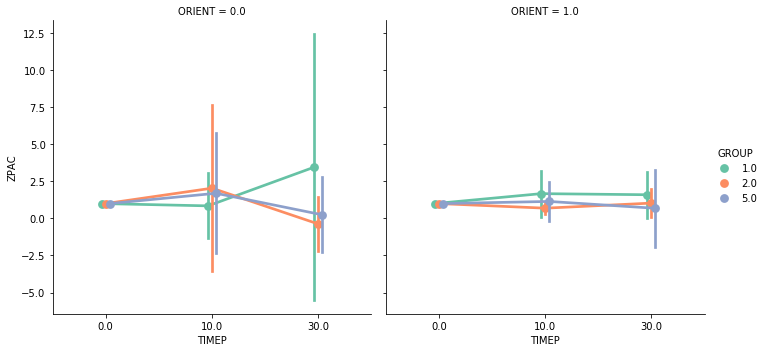

In [41]:
import seaborn as sns
ax = sns.catplot(x="TIMEP", y="ZPAC", hue="GROUP", data=Mixed_mod_n.loc[za],
                 col="ORIENT", dodge=True, kind="point", ci="sd", palette="Set2")


336
168
126


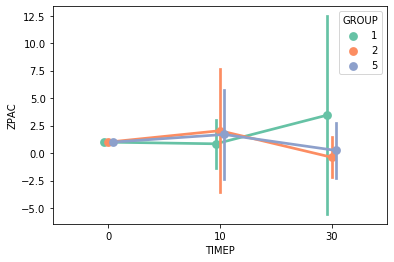

In [59]:
# ax = sns.catplot(x="TIMEP", y="ZPAC", hue="GROUP", data=Mixed_mod.loc[za],
#                     col="ORIENT", dodge=True, kind="point", ci="sd", palette="Set2")
print(len(Mixed_mod_n))
df_zp1=Mixed_mod_n

orient = df_zp1.groupby(df_zp1['ORIENT']).groups
zero_index = orient[0].values
one_index = orient[1].values
df_zp1.drop(df_zp1.index[one_index], axis=0, inplace= True)
df_zp1.reset_index(drop=True, inplace=True)
print(len(df_zp1))

timep = df_zp1.groupby(df_zp1['TIMEP']).groups
Bas = timep[0].values   #### When data is normalized
tACS = timep[5].values
df_zp1.drop(df_zp1.index[tACS], axis=0, inplace= True)
# df_zp1.drop(df_zp1.index[Bas], axis=0, inplace= True)
df_zp1.reset_index(drop=True, inplace=True)
print(len(df_zp1))

import seaborn as sns
ax = sns.pointplot(x="TIMEP", y="ZPAC", hue="GROUP", data=df_zp1, dodge=True, kind="point", ci="sd", palette="Set2")

In [84]:
### NORMALIZED ANOVA WITHOUT TACS TIMEPOINT

df_n = pd.read_csv('Mixed_mod_norm.txt', sep=r'\s', header=0, names = ['NDR', 'ZPAC', 'ORIENT', 'SUBJECT', 'GROUP', 'TIMEP'])
df_n.drop(df.index[126:], inplace= True)
df_n.drop(['ZPAC', 'ORIENT', 'SUBJECT'], axis= 1, inplace= True)
# print(df_n)
results_n = ols('NDR ~ C(GROUP)', data=df_n).fit()
results_n.summary()

/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NDR   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.08
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           9.82e-06
Time:                        10:48:36   Log-Likelihood:                -28.021
No. Observations:                 252   AIC:                             62.04
Df Residuals:                     249   BIC:                             72.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0434      0.030     35.152      0.000       0.985       1.102
C(GROUP)[T.2]    -0.2103      0.043     -4.916      0.000      -0.295      -0.126
C(GROUP)[T.5]    -0.1018      0.041     -2.467      0.014      -0.183      -0.021
==============================================================================
Omnibus:                       20.334   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.988
Skew:                           0.513   Prob(JB):                     1.87e-07
Kurtosis:                       4.378   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

        Source    SS  DF1  DF2    MS     F  p-unc  p-GG-corr   np2   eps  \
0         STIM  1.03    2   39  0.51  3.03   0.06        NaN  0.13   NaN   
1       TPOINT  0.24    3  117  0.08  2.21   0.09       0.14  0.05  0.74   
2  Interaction  0.70    6  117  0.12  3.18   0.01        NaN  0.14   NaN   

  sphericity  W-spher  p-spher  
0        NaN      NaN      NaN  
1      False     0.62      0.0  
2        NaN      NaN      NaN  
0.668791043694123


/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/pingouin/effsize.py:674: UserWarning: x and y have unequal sizes. Switching to paired == False.
  warnings.warn("x and y have unequal sizes. Switching to "
/home/robertofelipe_sg/anaconda3/lib/python3.6/site-packages/pingouin/effsize.py:713: RuntimeWarning: invalid value encountered in double_scalars
  d = (x.mean() - y.mean()) / poolsd


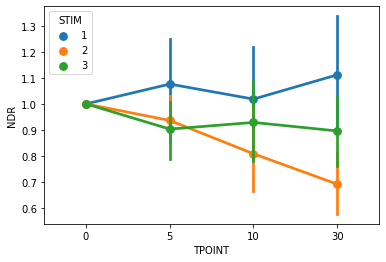

In [25]:
import numpy as np
import pandas as pd
import scipy
import mne
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm                                                                                                       
import statsmodels
import pingouin as pg

NDR = pd.read_excel('Raw_NDR.xlsx', 'Sheet2')
# print(NDR)

NDR_G1_Bsl = NDR['A_Bsl']
NDR_G1_Bsl = NDR_G1_Bsl.drop(index=1, inplace=False)
NDR_G2_Bsl = NDR['B_Bsl']
NDR_G2_Bsl = NDR_G2_Bsl.drop(index=[0,9], inplace=False)
NDR_G5_Bsl = NDR['E_Bsl']

NDR_G1_ACS = NDR['A_tACS']
NDR_G1_ACS = NDR_G1_ACS.drop(index=1, inplace=False)
NDR_G2_ACS = NDR['B_tACS']
NDR_G2_ACS = NDR_G2_ACS.drop(index=[0,9], inplace=False)
NDR_G5_ACS = NDR['E_tACS']

NDR_G1_P10 = NDR['A_P10']
NDR_G1_P10 = NDR_G1_P10.drop(index=1, inplace=False)
NDR_G2_P10 = NDR['B_P10']
NDR_G2_P10 = NDR_G2_P10.drop(index=[0,9], inplace=False)
NDR_G5_P10 = NDR['E_P10']

NDR_G1_P30 = NDR['A_P30']
NDR_G1_P30 = NDR_G1_P30.drop(index=1, inplace=False)
NDR_G2_P30 = NDR['B_P30']
NDR_G2_P30 = NDR_G2_P30.drop(index=[0,9], inplace=False)
NDR_G5_P30 = NDR['E_P30']

ndr_basic = pd.concat([NDR_G5_Bsl/NDR_G5_Bsl, NDR_G2_Bsl/NDR_G2_Bsl, NDR_G1_Bsl/NDR_G1_Bsl,
                     NDR_G5_ACS/NDR_G5_Bsl, NDR_G2_ACS/NDR_G2_Bsl, NDR_G1_ACS/NDR_G1_Bsl,
                     NDR_G5_P10/NDR_G5_Bsl, NDR_G2_P10/NDR_G2_Bsl, NDR_G1_P10/NDR_G1_Bsl,
                     NDR_G5_P30/NDR_G5_Bsl, NDR_G2_P30/NDR_G2_Bsl, NDR_G1_P30/NDR_G1_Bsl], axis=0)

# ndr_basic = pd.concat([NDR_G5_Bsl, NDR_G2_Bsl, NDR_G1_Bsl,
#                      NDR_G5_ACS, NDR_G2_ACS, NDR_G1_ACS,
#                      NDR_G5_P10, NDR_G2_P10, NDR_G1_P10,
#                      NDR_G5_P30, NDR_G2_P30, NDR_G1_P30], axis=0)
# print(ndr_basic)
ndr_basic = ndr_basic.reset_index(drop=True)

o = [number+1 for number in range(14)] #G1
a = [number+15 for number in range(13)] #G2
s = [number+28 for number in range(15)] #G5
subs = s+a+o+s+a+o+s+a+o+s+a+o
subj = pd.DataFrame(subs, columns=['ID']) 
subj = subj.reset_index(drop=True)

IPh = [1 for number in range(14)] #G1
APh = [2 for number in range(13)] #G2
Sham = [3 for number in range(15)] #G5
# IPh = ['InPhase' for number in range(14)] #G1
# APh = ['AntiPhase' for number in range(13)] #G2
# Sham = ['Sham' for number in range(15)] #G5
grouped = Sham+APh+IPh+Sham+APh+IPh+Sham+APh+IPh+Sham+APh+IPh
grou = pd.DataFrame(grouped, columns=['STIM']) 
grou = grou.reset_index(drop=True)
# print(grou)

Bs = [0 for number in range(42)] #'Bsl'
AC = [5 for number in range(42)] #'P10'
P1 = [10 for number in range(42)] #'P10'
P3 = [30 for number in range(42)] #'P30'
timepo = Bs+AC+P1+P3
tim = pd.DataFrame(timepo, columns=['TPOINT'])
tim = tim.reset_index(drop=True)
# print(tim)

behav = pd.concat([ndr_basic, grou, tim, subj], axis=1)
behav.rename(columns={0:'NDR'}, inplace=True)
# print(behav)
behav.to_csv('NDR_ANOVA_n.txt', sep='\t')

aov = pg.mixed_anova(dv='NDR', within='TPOINT', between='STIM', subject='ID', data=behav, correction=True, 
                     effsize='np2')
print(aov.round(2))

ap = behav[behav['STIM']==2]
ip = behav[behav['STIM']==1]
# print(x,y)

ef_si = pg.compute_effsize(x=ip['NDR'], y=ap['NDR'], paired=True, eftype='hedges')
print(ef_si)

import seaborn as sns
ax = sns.pointplot(x="TPOINT", y="NDR", hue="STIM", data=behav)

post = behav.pairwise_ttests(dv='NDR', within=['TPOINT'], between=['STIM'], subject='ID', interaction=1, padjust='bonf')
# print(post)


# results_n = ols('NDR ~ C(TPOINT)*C(STIM)', data=behav).fit()
# print(f"Overall model F({results_n.df_model: .0f},{results_n.df_resid: .0f}) = {results_n.fvalue: .3f}, p = {results_n.f_pvalue: .4f}")
# results_n.summary()
# res = sm.stats.anova_lm(results_n, typ= 2)
# print(res)